In [4]:
!pip install wget
import wget


In [6]:
import wget
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
myfile = wget.download(url)

100% [........................................................................] 87910968 / 87910968

In [7]:
pwd

'E:\\TensorflowDeveloperCertification\\Learning'

In [8]:
ls

 Volume in drive E has no label.
 Volume Serial Number is 0AAD-493B

 Directory of E:\TensorflowDeveloperCertification\Learning

19-03-2021  10.41 AM    <DIR>          .
19-03-2021  10.41 AM    <DIR>          ..
19-03-2021  09.06 AM    <DIR>          .ipynb_checkpoints
16-03-2021  05.45 PM            12,925 10.png
16-03-2021  05.45 PM             6,930 11.png
16-03-2021  05.45 PM             6,322 12.png
16-03-2021  05.46 PM             6,004 13.png
16-03-2021  05.46 PM            10,647 14.png
16-03-2021  05.46 PM             9,077 15.png
16-03-2021  04.48 PM    <DIR>          cats_and_dogs_filtered
17-03-2021  10.01 AM        68,606,236 cats_and_dogs_filtered.zip
12-03-2021  02.17 PM            48,158 CNN explaianed.ipynb
16-03-2021  10.33 AM         1,508,807 CNN+IMage datagenerator for complex images.ipynb
16-03-2021  12.24 PM         2,033,553 CNN+Imagedatagenerator+train-validation - Compacted images 150150 test.ipynb
16-03-2021  11.31 AM         2,119,241 CNN+Imagedatagenerator+

In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [1]:
pwd

'E:\\TensorflowDeveloperCertification\\Learning'

In [10]:
local_weights_file = 'E:\\TensorflowDeveloperCertification\\Learning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [11]:
local_weights_file

'E:\\TensorflowDeveloperCertification\\Learning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [12]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [13]:
pre_trained_model.load_weights(local_weights_file)

In [14]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [15]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [16]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [17]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [18]:
import wget
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
myfile = wget.download(url)

  1% [.                                                                       ]   958464 / 68606236

  3% [..                                                                      ]  2088960 / 68606236

  5% [...                                                                     ]  3440640 / 68606236

  6% [....                                                                    ]  4661248 / 68606236

  8% [......                                                                  ]  5931008 / 68606236

 10% [.......                                                                 ]  7143424 / 68606236

 11% [........                                                                ]  8028160 / 68606236

 13% [.........                                                               ]  9125888 / 68606236

 15% [...........                                                             ] 10600448 / 68606236

 17% [............                                                            ] 11853824 / 68606236

 18% [.............                                                           ] 12992512 / 68606236

 20% [...............                                                         ] 14336000 / 68606236

 22% [................                                                        ] 15564800 / 68606236

 23% [.................                                                       ] 16408576 / 68606236

 26% [..................                                                      ] 17907712 / 68606236

 27% [....................                                                    ] 19144704 / 68606236

 29% [.....................                                                   ] 20283392 / 68606236

 31% [......................                                                  ] 21610496 / 68606236

 33% [.......................                                                 ] 22855680 / 68606236

 35% [.........................                                               ] 24109056 / 68606236

 37% [..........................                                              ] 25591808 / 68606236

 39% [............................                                            ] 26861568 / 68606236

 40% [.............................                                           ] 28106752 / 68606236

 42% [..............................                                          ] 29343744 / 68606236

 44% [................................                                        ] 30588928 / 68606236

 46% [.................................                                       ] 31834112 / 68606236

 47% [..................................                                      ] 32538624 / 68606236

 48% [..................................                                      ] 33259520 / 68606236

 50% [....................................                                    ] 34562048 / 68606236

 52% [.....................................                                   ] 35831808 / 68606236

 54% [......................................                                  ] 37068800 / 68606236

 55% [........................................                                ] 38264832 / 68606236

 57% [.........................................                               ] 39534592 / 68606236

 59% [..........................................                              ] 40484864 / 68606236

 60% [...........................................                             ] 41795584 / 68606236

 62% [.............................................                           ] 43040768 / 68606236

 64% [..............................................                          ] 44236800 / 68606236

 66% [...............................................                         ] 45531136 / 68606236

 68% [.................................................                       ] 46743552 / 68606236

 69% [..................................................                      ] 47906816 / 68606236

 71% [...................................................                     ] 49176576 / 68606236

 73% [....................................................                    ] 50479104 / 68606236

 75% [......................................................                  ] 51724288 / 68606236

 77% [.......................................................                 ] 52969472 / 68606236

 79% [........................................................                ] 54206464 / 68606236

 80% [..........................................................              ] 55435264 / 68606236

 82% [...........................................................             ] 56631296 / 68606236

 84% [.............................................................           ] 58228736 / 68606236

 86% [..............................................................          ] 59473920 / 68606236

 88% [...............................................................         ] 60727296 / 68606236

 90% [.................................................................       ] 61956096 / 68606236

 92% [..................................................................      ] 63209472 / 68606236

 93% [...................................................................     ] 64454656 / 68606236

 95% [....................................................................    ] 65413120 / 68606236

 96% [.....................................................................   ] 66404352 / 68606236

 98% [......................................................................  ] 67354624 / 68606236

100% [........................................................................] 68606236 / 68606236

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

In [22]:
pwd

'E:\\TensorflowDeveloperCertification\\Learning'

In [23]:
ls

 Volume in drive E has no label.
 Volume Serial Number is 0AAD-493B

 Directory of E:\TensorflowDeveloperCertification\Learning

19-03-2021  10.51 AM    <DIR>          .
19-03-2021  10.51 AM    <DIR>          ..
19-03-2021  09.06 AM    <DIR>          .ipynb_checkpoints
16-03-2021  05.45 PM            12,925 10.png
16-03-2021  05.45 PM             6,930 11.png
16-03-2021  05.45 PM             6,322 12.png
16-03-2021  05.46 PM             6,004 13.png
16-03-2021  05.46 PM            10,647 14.png
16-03-2021  05.46 PM             9,077 15.png
16-03-2021  04.48 PM    <DIR>          cats_and_dogs_filtered
19-03-2021  10.50 AM        68,606,236 cats_and_dogs_filtered (1).zip
17-03-2021  10.01 AM        68,606,236 cats_and_dogs_filtered.zip
12-03-2021  02.17 PM            48,158 CNN explaianed.ipynb
16-03-2021  10.33 AM         1,508,807 CNN+IMage datagenerator for complex images.ipynb
16-03-2021  12.24 PM         2,033,553 CNN+Imagedatagenerator+train-validation - Compacted images 150150 tes

In [24]:
local_zip = 'E:\\TensorflowDeveloperCertification\\Learning/cats_and_dogs_filtered.zip'

In [26]:
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('E:\\TensorflowDeveloperCertification\\Learning')
zip_ref.close()

In [27]:
# Define our example directories and files
base_dir = 'E:\\TensorflowDeveloperCertification\\Learning/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')

In [28]:
train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

In [29]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

In [31]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [32]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 249s - loss: 0.3551 - accuracy: 0.8670 - val_loss: 0.1687 - val_accuracy: 0.9370
Epoch 2/20
100/100 - 247s - loss: 0.2199 - accuracy: 0.9150 - val_loss: 0.1117 - val_accuracy: 0.9590
Epoch 3/20
100/100 - 219s - loss: 0.2041 - accuracy: 0.9280 - val_loss: 0.1130 - val_accuracy: 0.9600
Epoch 4/20
100/100 - 217s - loss: 0.1757 - accuracy: 0.9345 - val_loss: 0.2526 - val_accuracy: 0.9360
Epoch 5/20
100/100 - 216s - loss: 0.2139 - accuracy: 0.9280 - val_loss: 0.1199 - val_accuracy: 0.9620
Epoch 6/20
100/100 - 217s - loss: 0.1729 - accuracy: 0.9360 - val_loss: 0.1402 - val_accuracy: 0.9580
Epoch 7/20
100/100 - 218s - loss: 0.1794 - accuracy: 0.9355 - val_loss: 0.1282 - val_accuracy: 0.9570
Epoch 8/20
100/100 - 218s - loss: 0.1571 - accuracy: 0.9455 - val_loss: 0.1227 - val_accuracy: 0.9610
Epoch 9/20
100/100 - 240s - loss: 0.1609 - accuracy: 0.9450 - val_loss: 0.1193 - val_accuracy: 0.9660
Epoch 10/20
100/100 - 228s - loss: 0.1758 - accuracy: 0.9400 - val_loss: 0.1201 - 

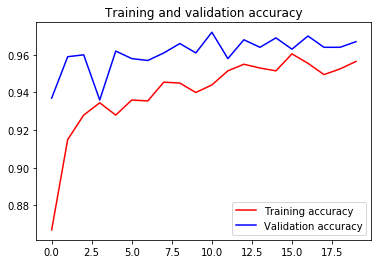

<Figure size 432x288 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [36]:
local_weights_file

'E:\\TensorflowDeveloperCertification\\Learning/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Transfer learning example

In this tutorial, you will learn how to classify images of cats and dogs by using transfer learning from a pre-trained network.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. You either use the pretrained model as is or use transfer learning to customize this model to a given task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

In this notebook, you will try two ways to customize a pretrained model:

Feature Extraction: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

You will follow the general machine learning workflow.

Examine and understand the data
Build an input pipeline, in this case using Keras ImageDataGenerator
Compose the model
Load in the pretrained base model (and pretrained weights)
Stack the classification layers on top
Train the model
Evaluate model

import matplotlib.pyplot

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data preprocessing

# Data download

In this tutorial, you will use a dataset containing several thousand images of cats and dogs. Download and extract a zip file containing the images, then create a tf.data.Dataset for training and validation using the tf.keras.preprocessing.image_dataset_from_directory utility. You can learn more about loading images in this tutorial.

In [38]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

68608000/68606236 [==============================] - 11s 0us/step
Found 2000 files belonging to 2 classes.


In [39]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


Show the first nine images and labels from the training set:

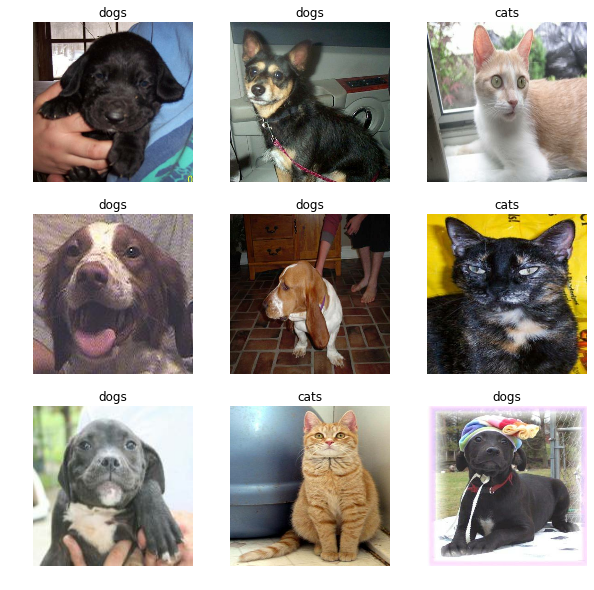

In [40]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

As the original dataset doesn't contains a test set, you will create one. To do so, determine how many batches of data are available in the validation set using tf.data.experimental.cardinality, then move 20% of them to a test set.

In [41]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [42]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 26
Number of test batches: 6


# Configure the dataset for performance

Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the data performance guide.

In [43]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Use data augmentation
When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce overfitting. You can learn more about data augmentation in this tutorial.

In [44]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

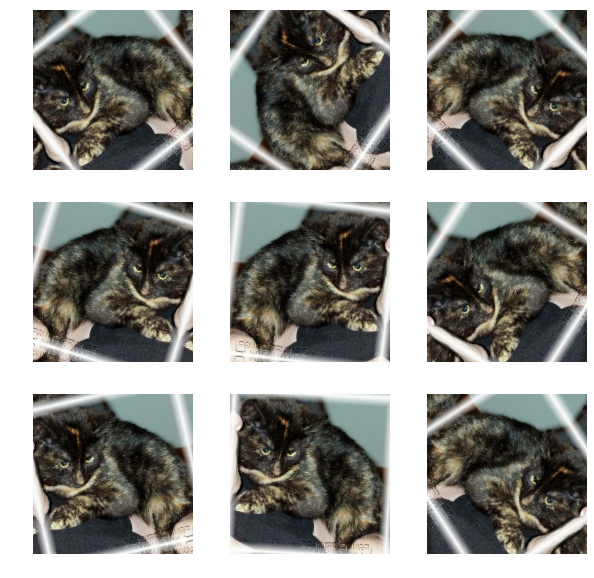

In [45]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# Rescale pixel values
In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel vaues in [-1,1], but at this point, the pixel values in your images are in [0-255]. To rescale them, use the preprocessing method included with the model.

In [46]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [47]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

# Create the base model from the pre-trained convnets

You will create the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [48]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [49]:
IMG_SIZE

(160, 160)

This feature extractor converts each 160x160x3 image into a 5x5x1280 block of features. Let's see what it does to an example batch of images:

In [50]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


# Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [51]:
base_model.trainable = False

# Important note about BatchNormalization layers
Many models contain tf.keras.layers.BatchNormalization layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial.

When you set layer.trainable = False, the BatchNormalization layer will run in inference mode, and will not update its mean and variance statistics.

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing training = False when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

In [52]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

# Add a classification head
To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [53]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [54]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [55]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model

Compile the model before training it. Since there are two classes, use a binary cross-entropy loss with from_logits=True since the model provides a linear output.

In [56]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [58]:
len(model.trainable_variables)

2

# Train the model
After training for 10 epochs, you should see ~94% accuracy on the validation set.

In [59]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)


26/26 [==============================] - 28s 856ms/step - loss: 0.7830 - accuracy: 0.4706


In [60]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.78
initial accuracy: 0.48


In [61]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
63/63 [==============================] - 90s 1s/step - loss: 0.6810 - accuracy: 0.5900 - val_loss: 0.5221 - val_accuracy: 0.7240
Epoch 2/10
63/63 [==============================] - 83s 1s/step - loss: 0.5295 - accuracy: 0.7065 - val_loss: 0.3818 - val_accuracy: 0.8267
Epoch 3/10
63/63 [==============================] - 80s 1s/step - loss: 0.4127 - accuracy: 0.7965 - val_loss: 0.2943 - val_accuracy: 0.8824
Epoch 4/10
63/63 [==============================] - 79s 1s/step - loss: 0.3438 - accuracy: 0.8465 - val_loss: 0.2469 - val_accuracy: 0.9109
Epoch 5/10
63/63 [==============================] - 79s 1s/step - loss: 0.3024 - accuracy: 0.8600 - val_loss: 0.2086 - val_accuracy: 0.9270
Epoch 6/10
63/63 [==============================] - 83s 1s/step - loss: 0.2752 - accuracy: 0.8825 - val_loss: 0.1845 - val_accuracy: 0.9307
Epoch 7/10
63/63 [==============================] - 83s 1s/step - loss: 0.2561 - accuracy: 0.8840 - val_loss: 0.1673 - val_accuracy: 0.9369
Epoch 8/10
63/63 [==

# Learning curves
Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

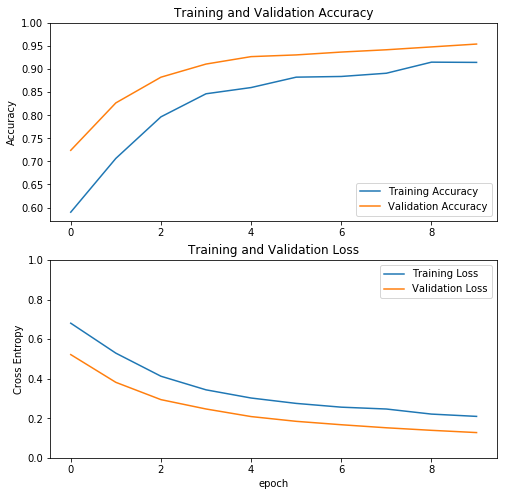

In [62]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

# Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNet V2 base model. The weights of the pre-trained network were not updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

# Un-freeze the top layers of the model
All you need to do is unfreeze the base_model and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [63]:
base_model.trainable = True

In [64]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


Compile the model
As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [65]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0   

In [67]:
len(model.trainable_variables)

56

# Continue training the model
If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [69]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/20
63/63 [==============================] - 121s 2s/step - loss: 0.1990 - accuracy: 0.9169 - val_loss: 0.0623 - val_accuracy: 0.9752
Epoch 11/20
63/63 [==============================] - 110s 2s/step - loss: 0.1299 - accuracy: 0.9366 - val_loss: 0.0450 - val_accuracy: 0.9851
Epoch 12/20
63/63 [==============================] - 118s 2s/step - loss: 0.1170 - accuracy: 0.9525 - val_loss: 0.0408 - val_accuracy: 0.9839
Epoch 13/20
63/63 [==============================] - 111s 2s/step - loss: 0.0964 - accuracy: 0.9593 - val_loss: 0.0468 - val_accuracy: 0.9814
Epoch 14/20
63/63 [==============================] - 105s 2s/step - loss: 0.0914 - accuracy: 0.9568 - val_loss: 0.0465 - val_accuracy: 0.9765
Epoch 15/20
63/63 [==============================] - 116s 2s/step - loss: 0.0772 - accuracy: 0.9684 - val_loss: 0.0376 - val_accuracy: 0.9814
Epoch 16/20
63/63 [==============================] - 117s 2s/step - loss: 0.0691 - accuracy: 0.9741 - val_loss: 0.0647 - val_accuracy: 0.9703
Epoch 

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNet V2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNet V2 datasets.

After fine tuning the model nearly reaches 98% accuracy on the validation set.

In [70]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

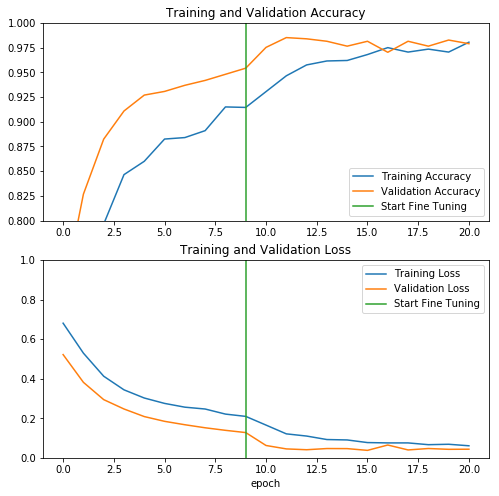

In [71]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluation and prediction
Finaly you can verify the performance of the model on new data using test set

In [72]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

6/6 [==============================] - 6s 729ms/step - loss: 0.0121 - accuracy: 0.9948
Test accuracy : 0.9947916865348816


And now you are all set to use this model to predict if your pet is a cat or dog.

Predictions:
 [1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0]
Labels:
 [1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0]


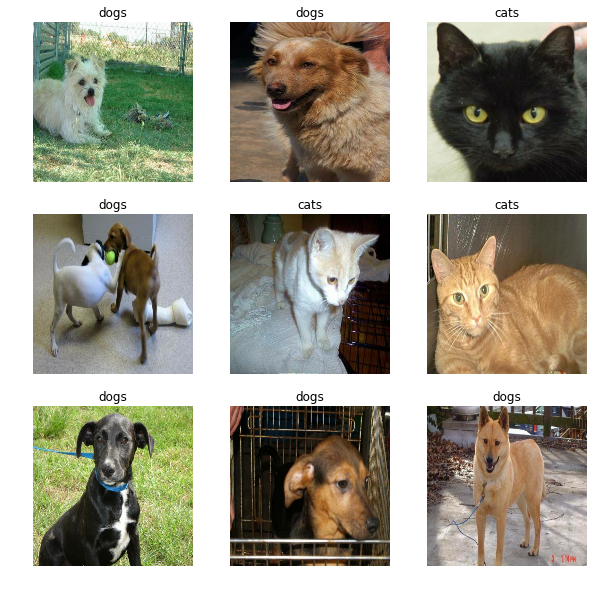

In [73]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")